<a href="https://colab.research.google.com/github/fernandosinaga123456/k-means-clustering-dan-prediksi-decision-tree-data-penyakit/blob/main/k-means_and_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Langkah 1: Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.spatial.distance import cdist
import warnings
warnings.filterwarnings('ignore')

# Set style untuk plotting
plt.style.use('default')
sns.set_palette("husl")

print("Library berhasil diimport!")

Library berhasil diimport!


In [ ]:
# Langkah 2: Import File Excel dan Baca File
from google.colab import files

print("Silahkan upload file Excel Anda:")
uploaded = files.upload()

# Baca file Excel
filename = list(uploaded.keys())[0]
df_original = pd.read_excel(filename)

print(f"\nFile '{filename}' berhasil dibaca!")
print(f"Shape data: {df_original.shape}")
print("\nPreview data:")
print(df_original.head(10))

Silahkan upload file Excel Anda:


Saving Data Fernando.xlsx to Data Fernando.xlsx

File 'Data Fernando.xlsx' berhasil dibaca!
Shape data: (4633, 3)

Preview data:
   Usia Jenis Kelamin   Penyakit
0    11     Laki-Laki      Abses
1     5     Perempuan      Abses
2    11     Perempuan     Alergi
3    14     Laki-Laki     Alergi
4     6     Laki-Laki     Alergi
5     7     Laki-Laki     Alergi
6    13     Perempuan     Alergi
7    13     Perempuan     Alergi
8    62     Laki-Laki  Asam Urat
9    66     Laki-Laki  Asam Urat


In [ ]:
# Langkah 3: Encoding Variabel Kategorial
print("ENCODING VARIABEL KATEGORIAL \n")

# Copy dataframe untuk encoding
df = df_original.copy()

# Dictionary untuk encoding Penyakit
penyakit_encoding = {
    'Abses': 1, 'Alergi': 2, 'Asam Urat': 3, 'Asma': 4, 'Bronchitis': 5,
    'Caries': 6, 'Demam': 7, 'Dermatitis': 8, 'Diabetes': 9, 'Diare': 10,
    'Dispepsia': 11, 'Faringitis': 12, 'Gastritis': 13, 'Hipertensi': 14,
    'Hipotensi': 15, 'ISPA': 16, 'Mialgia': 17, 'Rematik': 18, 'TB. Paru': 19,
    'Tonsilitis': 20, 'Vertigo': 21, 'Vulnus Laceratum': 22
}

# Dictionary untuk encoding Jenis Kelamin
jenis_kelamin_encoding = {
    'Laki-Laki': 1,
    'Perempuan': 2
}

# Fungsi untuk encoding usia berdasarkan rentang
def encode_usia(usia):
    if usia <= 4:
        return 1
    elif usia <= 11:
        return 2
    elif usia <= 16:
        return 3
    elif usia <= 25:
        return 4
    elif usia <= 35:
        return 5
    elif usia <= 45:
        return 6
    elif usia <= 55:
        return 7
    elif usia <= 65:
        return 8
    else:
        return 9

# Penerapan encoding
df['Usia'] = df['Usia'].apply(encode_usia)
df['Jenis Kelamin'] = df['Jenis Kelamin'].map(jenis_kelamin_encoding)
df['Penyakit'] = df['Penyakit'].map(penyakit_encoding)

print("Encoding berhasil dilakukan!")
print("\nData setelah encoding:")
print(df.head(10))

ENCODING VARIABEL KATEGORIAL 

Encoding berhasil dilakukan!

Data setelah encoding:
   Usia  Jenis Kelamin  Penyakit
0     2              1         1
1     2              2         1
2     2              2         2
3     3              1         2
4     2              1         2
5     2              1         2
6     3              2         2
7     3              2         2
8     8              1         3
9     9              1         3


EKSPLORASI DATA 

Statistik Deskriptif:
              Usia  Jenis Kelamin     Penyakit
count  4633.000000    4633.000000  4633.000000
mean      5.073602       1.495791    11.563782
std       2.873931       0.500036     5.340832
min       1.000000       1.000000     1.000000
25%       2.000000       1.000000     7.000000
50%       6.000000       1.000000    12.000000
75%       8.000000       2.000000    16.000000
max       9.000000       2.000000    22.000000

Missing Values:
Usia             0
Jenis Kelamin    0
Penyakit         0
dtype: int64




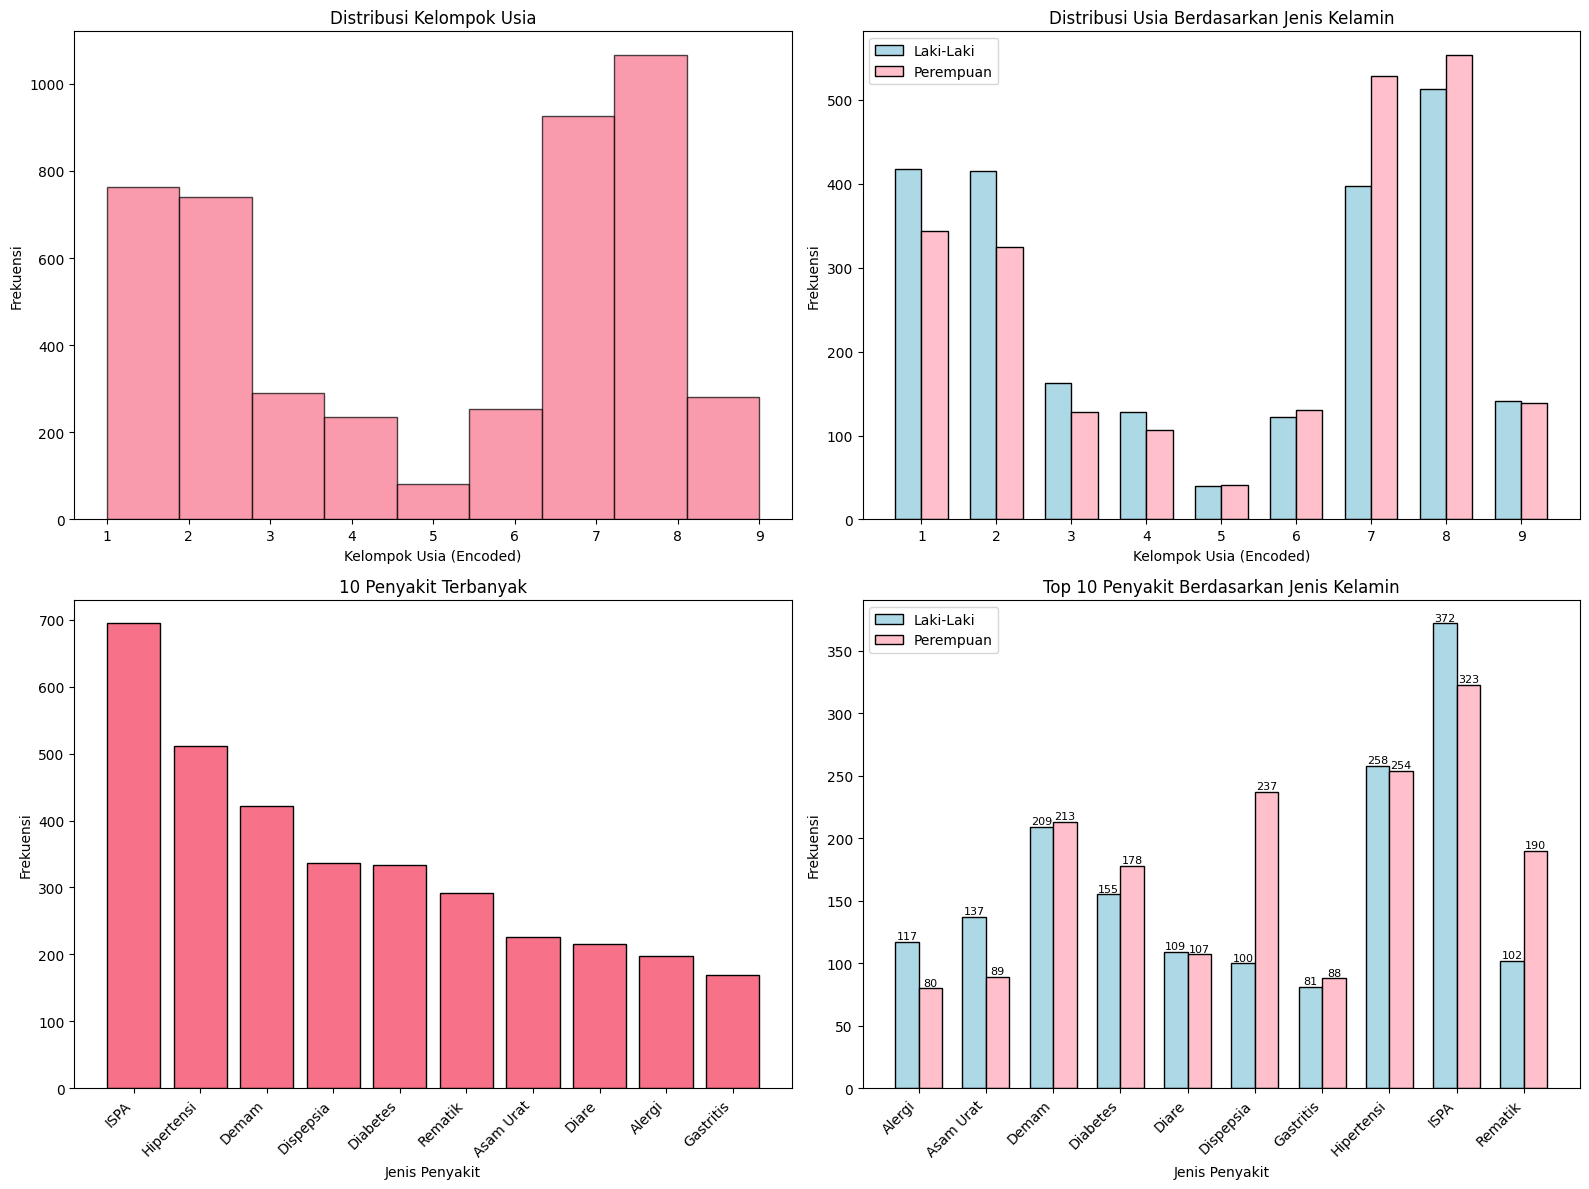

In [ ]:
# Langkah 4: Eksplorasi Data
print("EKSPLORASI DATA \n")
print("Statistik Deskriptif:")
print(df.describe())

# Cek missing values
print(f"\nMissing Values:")
print(df.isnull().sum())

# Visualisasi distribusi data
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Ensure numpy is imported for np.linspace

print("\n")
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Distribusi Usia (encoded)
axes[0,0].hist(df['Usia'], bins=9, edgecolor='black', alpha=0.7)
axes[0,0].set_title('Distribusi Kelompok Usia')
axes[0,0].set_xlabel('Kelompok Usia (Encoded)')
axes[0,0].set_ylabel('Frekuensi')

# Distribusi Usia berdasarkan Jenis Kelamin
# Membuat grouped bar chart untuk distribusi usia berdasarkan jenis kelamin
usia_gender = df.groupby(['Usia', 'Jenis Kelamin']).size().unstack(fill_value=0)

# Membuat bar chart dengan posisi bersebelahan
x = np.arange(len(usia_gender.index))
width = 0.35

bars1 = axes[0,1].bar(x - width/2, usia_gender.iloc[:, 0], width,
                   label='Laki-Laki', color='lightblue', edgecolor='black')
bars2 = axes[0,1].bar(x + width/2, usia_gender.iloc[:, 1], width,
                   label='Perempuan', color='pink', edgecolor='black')

axes[0,1].set_title('Distribusi Usia Berdasarkan Jenis Kelamin')
axes[0,1].set_xlabel('Kelompok Usia (Encoded)')
axes[0,1].set_ylabel('Frekuensi')
axes[0,1].set_xticks(x)
axes[0,1].set_xticklabels(usia_gender.index)
axes[0,1].legend()

# Distribusi Penyakit (top 10) - gunakan inverse mapping untuk mendapatkan nama asli
top_penyakit_encoded = df['Penyakit'].value_counts().head(10)
# Buat inverse mapping dari disease_encoding
inverse_disease_mapping = {v: k for k, v in penyakit_encoding.items()}
# Convert encoded values ke nama penyakit asli
top_penyakit_names = [inverse_disease_mapping[encoded_val] for encoded_val in top_penyakit_encoded.index]

axes[1,0].bar(range(len(top_penyakit_encoded)), top_penyakit_encoded.values, edgecolor='black')
axes[1,0].set_title('10 Penyakit Terbanyak')
axes[1,0].set_xlabel('Jenis Penyakit')
axes[1,0].set_ylabel('Frekuensi')
axes[1,0].set_xticks(range(len(top_penyakit_encoded)))
axes[1,0].set_xticklabels(top_penyakit_names, rotation=45, ha='right')

# GRAFIK BARU: Penyakit berdasarkan Jenis Kelamin (Top 10)
# Ambil top 10 penyakit dan lihat distribusinya berdasarkan jenis kelamin
top_10_diseases = df['Penyakit'].value_counts().head(10).index
df_top10 = df[df['Penyakit'].isin(top_10_diseases)]

# Buat crosstab untuk penyakit vs jenis kelamin
disease_gender = pd.crosstab(df_top10['Penyakit'], df_top10['Jenis Kelamin'])

# Convert index dari encoded ke nama asli
disease_gender.index = [inverse_disease_mapping[idx] for idx in disease_gender.index]

# Buat grouped bar chart
x_pos = np.arange(len(disease_gender.index))
width = 0.35

bars1 = axes[1,1].bar(x_pos - width/2, disease_gender.iloc[:, 0], width,
                     label='Laki-Laki', color='lightblue', edgecolor='black')
bars2 = axes[1,1].bar(x_pos + width/2, disease_gender.iloc[:, 1], width,
                     label='Perempuan', color='pink', edgecolor='black')

axes[1,1].set_title('Top 10 Penyakit Berdasarkan Jenis Kelamin')
axes[1,1].set_xlabel('Jenis Penyakit')
axes[1,1].set_ylabel('Frekuensi')
axes[1,1].set_xticks(x_pos)
axes[1,1].set_xticklabels(disease_gender.index, rotation=45, ha='right')
axes[1,1].legend()

# Tambahkan nilai di atas setiap bar untuk grafik penyakit berdasarkan jenis kelamin
for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    height1 = bar1.get_height()
    height2 = bar2.get_height()
    axes[1,1].text(bar1.get_x() + bar1.get_width()/2., height1 + 0.5,
                   f'{int(height1)}', ha='center', va='bottom', fontsize=8)
    axes[1,1].text(bar2.get_x() + bar2.get_width()/2., height2 + 0.5,
                   f'{int(height2)}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

NORMALISASI DATA YANG SUDAH DI-ENCODING DENGAN MIN MAX SCALER 

Data setelah normalisasi Min-Max Scaling (rentang 0-1):
              Usia  Jenis Kelamin     Penyakit
count  4633.000000    4633.000000  4633.000000
mean      0.509200       0.495791     0.503037
std       0.359241       0.500036     0.254325
min       0.000000       0.000000     0.000000
25%       0.125000       0.000000     0.285714
50%       0.625000       0.000000     0.523810
75%       0.875000       1.000000     0.714286
max       1.000000       1.000000     1.000000

DATA SETELAH NORMALISASI:
Sampel Data Setelah Normalisasi:
   Index   Usia  Jenis Kelamin  Penyakit
0      0  0.125            0.0    0.0000
1      1  0.125            1.0    0.0000
2      2  0.125            1.0    0.0476
3      3  0.250            0.0    0.0476
4      4  0.125            0.0    0.0476
5      5  0.125            0.0    0.0476
6      6  0.250            1.0    0.0476
7      7  0.250            1.0    0.0476
8      8  0.875            0

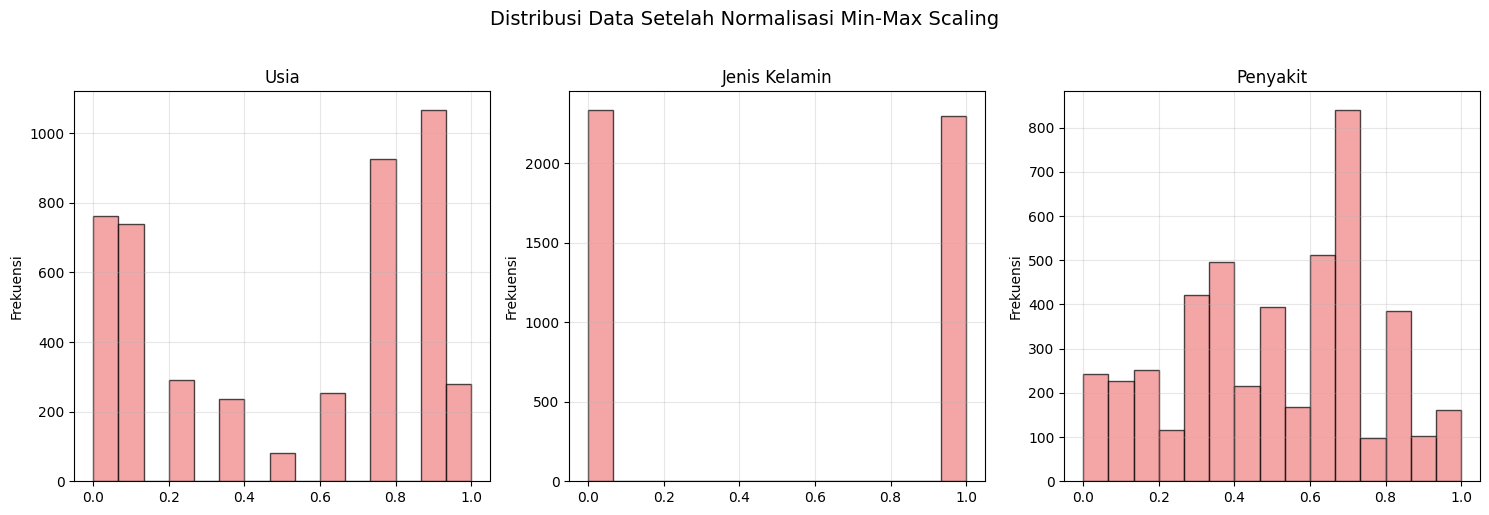

In [ ]:
# Langkah 5: Normalisasi Data Dengan Min-Max Scaler
print("NORMALISASI DATA YANG SUDAH DI-ENCODING DENGAN MIN MAX SCALER \n")

# Siapkan data encoded untuk normalisasi (3 variabel)
X_encoded = df[['Usia', 'Jenis Kelamin', 'Penyakit']].copy()

# Normalisasi data menggunakan Min-Max Scaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X_encoded)
X_normalized_df = pd.DataFrame(X_normalized, columns=['Usia', 'Jenis Kelamin', 'Penyakit'])

print("Data setelah normalisasi Min-Max Scaling (rentang 0-1):")
print(X_normalized_df.describe())

# Tampilkan sampel data setelah normalisasi
print("\nDATA SETELAH NORMALISASI:")


# Buat dataframe untuk menampilkan data yang sudah dinormalisasi
normalized_sample = pd.DataFrame({
    'Index': range(len(X_normalized_df.head(10))),
    'Usia': X_normalized_df['Usia'].head(10).values,
    'Jenis Kelamin': X_normalized_df['Jenis Kelamin'].head(10).values,
    'Penyakit': X_normalized_df['Penyakit'].head(10).values
})

print("Sampel Data Setelah Normalisasi:")
print(normalized_sample.round(4))

# Visualisasi data setelah normalisasi
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plotting data normalized saja
for i, col in enumerate(['Usia', 'Jenis Kelamin', 'Penyakit']):
    axes[i].hist(X_normalized_df[col], bins=15, alpha=0.7, color='lightcoral', edgecolor='black')
    axes[i].set_title(f'{col}')
    axes[i].set_ylabel('Frekuensi')
    axes[i].grid(True, alpha=0.3)

plt.suptitle('Distribusi Data Setelah Normalisasi Min-Max Scaling', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

In [ ]:
# Langkah 6: Penentuan K Optimal Dengan Silhouette Score
print("PENENTUAN K OPTIMAL DENGAN SILHOUETTE SCORE\n")

# Range K untuk testing
k_range = range(2, 11)
silhouette_scores = []

print("Menghitung Silhouette Score untuk berbagai nilai K")
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_normalized)  # Input: data normalized
    silhouette_avg = silhouette_score(X_normalized, cluster_labels)  # Evaluasi pada data normalized
    silhouette_scores.append(silhouette_avg)

# Tampilkan hasil dalam bentuk tabel
print("\nHASIL SILHOUETTE SCORE:")

# Buat DataFrame untuk tabel hasil
silhouette_results = pd.DataFrame({
    'K': list(k_range),
    'Silhouette Score': silhouette_scores
})

# Print tanpa index
print(silhouette_results.round(4).to_string(index=False))

# Temukan K optimal
optimal_k = k_range[np.argmax(silhouette_scores)]
best_silhouette = max(silhouette_scores)

print(f"\nHasil analisis:")
print(f"K Optimal: {optimal_k}")
print(f"Silhouette Score Terbaik: {best_silhouette:.4f}")

PENENTUAN K OPTIMAL DENGAN SILHOUETTE SCORE

Menghitung Silhouette Score untuk berbagai nilai K

HASIL SILHOUETTE SCORE:
 K  Silhouette Score
 2            0.5324
 3            0.5212
 4            0.5513
 5            0.5526
 6            0.5556
 7            0.5126
 8            0.5270
 9            0.5198
10            0.5036

Hasil analisis:
K Optimal: 6
Silhouette Score Terbaik: 0.5556


VISUALISASI HASIL SILHOUETTE SCORE



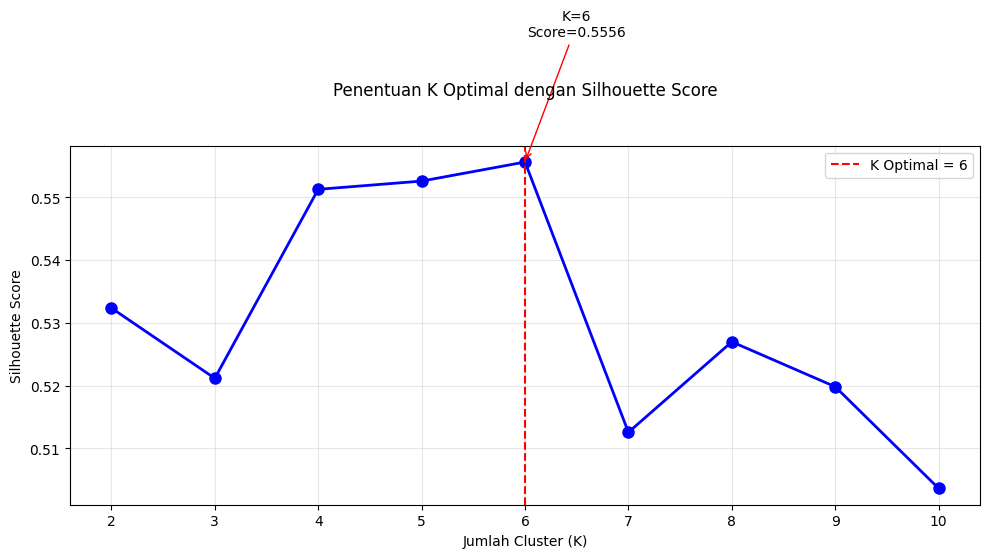

In [ ]:
# Langkah 7: Visualisasi Hasil Silhouette Score
print("VISUALISASI HASIL SILHOUETTE SCORE\n")

plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, 'bo-', linewidth=2, markersize=8)
plt.axvline(x=optimal_k, color='red', linestyle='--',
           label=f'K Optimal = {optimal_k}')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Silhouette Score')
plt.title('Penentuan K Optimal dengan Silhouette Score\n\n')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xticks(k_range)

# Annotate the best point
plt.annotate(f'K={optimal_k}\nScore={best_silhouette:.4f}',
             xy=(optimal_k, best_silhouette),
             xytext=(optimal_k+0.5, best_silhouette+0.02),
             arrowprops=dict(arrowstyle='->', color='red'),
             fontsize=10, ha='center')

plt.tight_layout()
plt.show()

In [ ]:
# Langkah 8: Implementasi Clustering Dengan K Optimal
print("IMPLEMENTASI CLUSTERING DENGAN K OPTIMAL")

# Terapkan K-Means dengan K optimal pada data normalized
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_normalized)  # Input: data normalized

# Tambahkan hasil cluster ke dataframe (dimulai dari 1)
df['Cluster'] = cluster_labels + 1
X_encoded['Cluster'] = cluster_labels + 1 # Add 'Cluster' column to X_encoded here
X_normalized_df['Cluster'] = cluster_labels + 1

print(f"Clustering berhasil dengan K = {optimal_k}")
print(f"Data input: {X_normalized.shape[0]} records, {X_normalized.shape[1]} features")

print(f"\nDistribusi Cluster:")
# Calculate cluster distribution
cluster_distribution = pd.Series(cluster_labels).value_counts().sort_index()

for cluster, count in cluster_distribution.items():
    print(f"Cluster {cluster + 1}: {count} data")

# Tampilkan centroid cluster pada data normalized
print(f"\nCentroid Cluster:")
centroids = kmeans_final.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns=['Usia', 'Jenis Kelamin', 'Penyakit'])
centroid_df.index = [f'Cluster {i+1}' for i in range(len(centroids))]

# Bersihkan nilai -0.0 (opsional untuk tampilan yang lebih bersih)
centroid_df = centroid_df.applymap(lambda x: 0.0 if abs(x) < 1e-10 else x)

print(centroid_df.round(4))

# Tampilkan 10 data awal dengan cluster
print("\n10 Data Awal dengan Hasil Clustering:")
sample_data = df[['Usia', 'Jenis Kelamin', 'Penyakit', 'Cluster']].head(10)
print(sample_data)

IMPLEMENTASI CLUSTERING DENGAN K OPTIMAL
Clustering berhasil dengan K = 6
Data input: 4633 records, 3 features

Distribusi Cluster:
Cluster 1: 906 data
Cluster 2: 707 data
Cluster 3: 1391 data
Cluster 4: 506 data
Cluster 5: 589 data
Cluster 6: 534 data

Centroid Cluster:
             Usia  Jenis Kelamin  Penyakit
Cluster 1  0.1256            1.0    0.4783
Cluster 2  0.7993            0.0    0.6763
Cluster 3  0.8060            1.0    0.5513
Cluster 4  0.8276            0.0    0.2167
Cluster 5  0.1335            0.0    0.2540
Cluster 6  0.1156            0.0    0.7358

10 Data Awal dengan Hasil Clustering:
   Usia  Jenis Kelamin  Penyakit  Cluster
0     2              1         1        5
1     2              2         1        1
2     2              2         2        1
3     3              1         2        5
4     2              1         2        5
5     2              1         2        5
6     3              2         2        1
7     3              2         2        1
8     8   

In [ ]:
# Langkah 9: Analisis Karakteristik Cluster
print("ANALISIS KARAKTERISTIK CLUSTER \n")

import pandas as pd
from tabulate import tabulate

# Set pandas display options untuk menghindari text terpotong
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)

# Define encoding dictionaries for reverse mapping
usia_encoding = {
    '0-4 Tahun': 1,
    '5-11 Tahun': 2,
    '12-16 Tahun': 3,
    '17-25 Tahun': 4,
    '26-35 Tahun': 5,
    '36-45 Tahun': 6,
    '46-55 Tahun': 7,
    '56-65 Tahun': 8,
    '> 65 Tahun': 9
}

# Reverse mapping untuk decode (untuk keperluan interpretasi)
usia_decode = {v: k for k, v in usia_encoding.items()}
jenis_kelamin_decode = {v: k for k, v in jenis_kelamin_encoding.items()}
penyakit_decode = {v: k for k, v in penyakit_encoding.items()}

# Add 'Cluster' column to X_encoded
X_encoded['Cluster'] = cluster_labels + 1

# 1. INTERPRETASI CLUSTER - FORMAT TABEL PER CLUSTER
print("INTERPRETASI KARAKTERISTIK CLUSTER")

# Buat list untuk menyimpan data summary
summary_data = []

for cluster_id in sorted(df['Cluster'].unique()):
    print(f"\nCLUSTER {cluster_id} - DETAIL PENYAKIT DAN KELOMPOK USIA:")
    print("-" * 50)

    cluster_data_encoded = X_encoded[X_encoded['Cluster'] == cluster_id]
    total_data = len(cluster_data_encoded)

    # Buat data untuk tabel cluster ini
    cluster_table_data = []

    # Top 3 diseases untuk cluster ini
    top_3_diseases = cluster_data_encoded['Penyakit'].value_counts().head(3)

    # Ambil penyakit utama untuk summary
    top_disease_code = top_3_diseases.index[0]
    top_disease_name = penyakit_decode[top_disease_code]
    top_disease_count = top_3_diseases.iloc[0]

    # Ambil kelompok usia utama untuk penyakit utama
    top_disease_data = cluster_data_encoded[cluster_data_encoded['Penyakit'] == top_disease_code]
    top_age_code = top_disease_data['Usia'].value_counts().index[0]
    top_age_name = usia_decode[top_age_code]

    # Simpan untuk summary
    summary_data.append({
        'Cluster': cluster_id,
        'Jumlah Data': total_data,
        'Penyakit Utama': top_disease_name,
        'Jumlah Kasus': top_disease_count,
        'Persentase': f'{(top_disease_count/total_data)*100:.1f}%',
        'Kelompok Usia Utama': top_age_name
    })

    for rank, (disease_code, count) in enumerate(top_3_diseases.items(), 1):
        disease_name = penyakit_decode[disease_code]
        pct = (count / total_data) * 100

        # Top 3 kelompok usia untuk penyakit ini dalam cluster ini
        disease_age_data = cluster_data_encoded[cluster_data_encoded['Penyakit'] == disease_code]
        top_3_ages = disease_age_data['Usia'].value_counts().head(3)

        # Baris untuk setiap kelompok usia
        for age_rank, (age_code, age_count) in enumerate(top_3_ages.items(), 1):
            age_name = usia_decode[age_code]
            age_pct = (age_count / count) * 100

            if age_rank == 1:
                # Baris pertama dengan informasi penyakit dan kelompok usia pertama
                cluster_table_data.append({
                    'Rank': f'{rank}',
                    'Nama Penyakit': disease_name,
                    'Kode Penyakit': disease_code,
                    'Jumlah Kasus': count,
                    'Persentase': f'{pct:.1f}%',
                    'Kelompok Usia': f'{age_rank}. {age_name}: {age_count} ({age_pct:.1f}%)'
                })
            else:
                # Baris untuk kelompok usia ke-2 dan ke-3
                cluster_table_data.append({
                    'Rank': '',
                    'Nama Penyakit': '',
                    'Kode Penyakit': '',
                    'Jumlah Kasus': '',
                    'Persentase': '',
                    'Kelompok Usia': f'{age_rank}. {age_name}: {age_count} ({age_pct:.1f}%)'
                })

    # Tampilkan tabel untuk cluster ini
    cluster_df = pd.DataFrame(cluster_table_data)
    print(tabulate(cluster_df, headers='keys', tablefmt='simple', showindex=False))

# BUAT SUMMARY DATAFRAME
summary_df = pd.DataFrame(summary_data)

# 2. RINGKASAN KARAKTERISTIK CLUSTER (di bagian bawah)
print("RINGKASAN KARAKTERISTIK CLUSTER")

# Tampilkan kembali ringkasan cluster
print(tabulate(summary_df, headers='keys', tablefmt='simple', showindex=False))

ANALISIS KARAKTERISTIK CLUSTER 

INTERPRETASI KARAKTERISTIK CLUSTER

CLUSTER 1 - DETAIL PENYAKIT DAN KELOMPOK USIA:
--------------------------------------------------
Rank    Nama Penyakit    Kode Penyakit    Jumlah Kasus    Persentase    Kelompok Usia
------  ---------------  ---------------  --------------  ------------  --------------------------
1       ISPA             16               318             35.1%         1. 0-4 Tahun: 194 (61.0%)
                                                                        2. 5-11 Tahun: 94 (29.6%)
                                                                        3. 12-16 Tahun: 20 (6.3%)
2       Demam            7                192             21.2%         1. 0-4 Tahun: 70 (36.5%)
                                                                        2. 5-11 Tahun: 61 (31.8%)
                                                                        3. 12-16 Tahun: 35 (18.2%)
3       Diare            10               95              10

LANGKAH 10: VISUALISASI HASIL CLUSTERING 



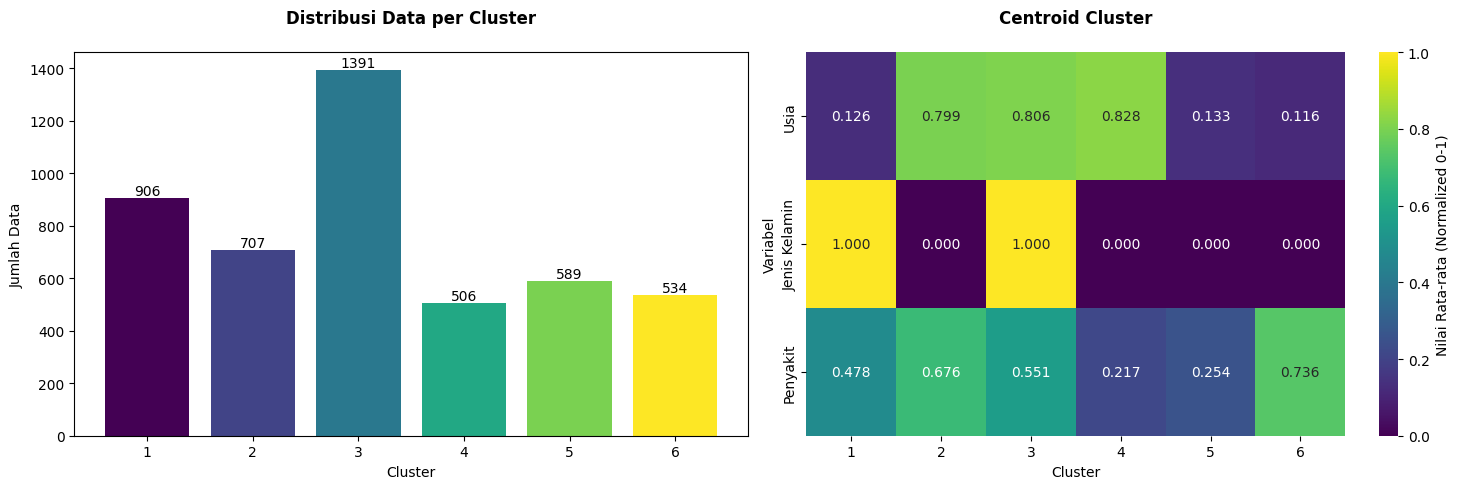

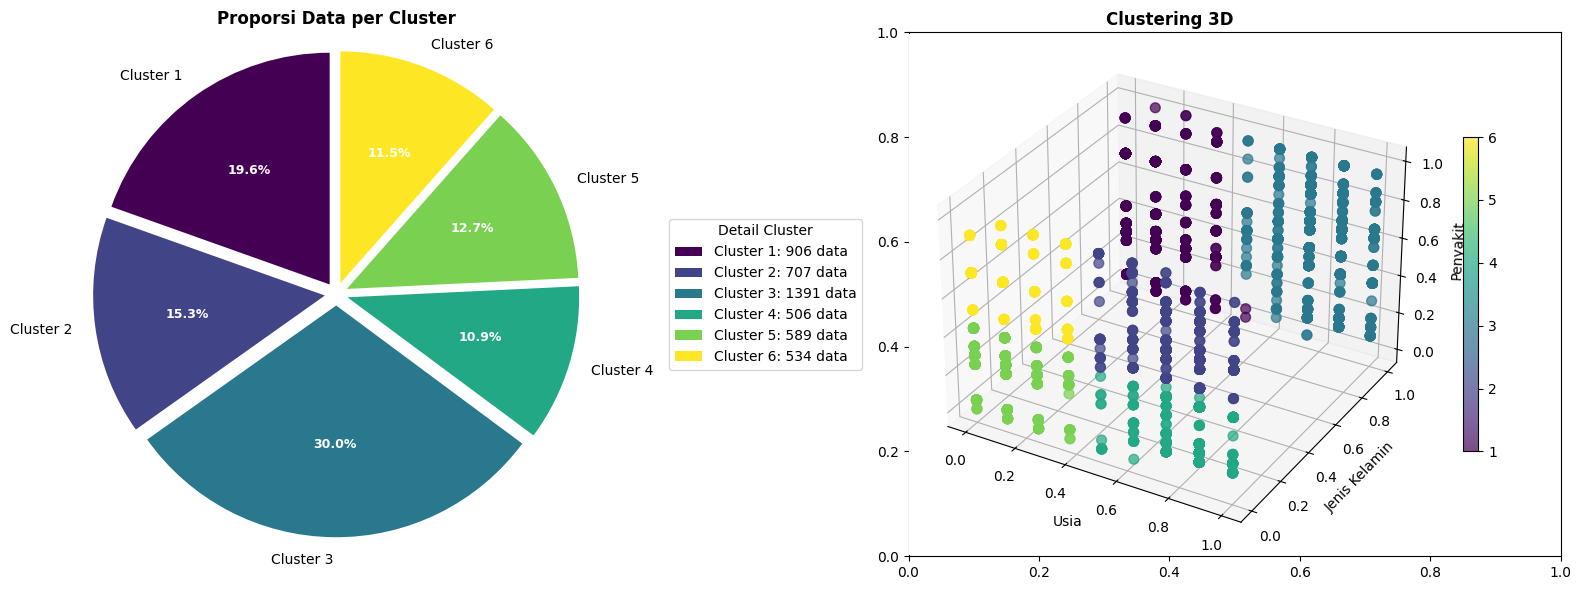

In [ ]:
# Langkah 10: Visualisasi Hasil Clustering
print("LANGKAH 10: VISUALISASI HASIL CLUSTERING \n")

# Visualisasi 1 & 2: Distribusi Data per Cluster dan Heatmap Karakteristik Cluster
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Distribusi Data per Cluster
cluster_counts = df['Cluster'].value_counts().sort_index()
bars = axes[0].bar(cluster_counts.index, cluster_counts.values,
                    color=plt.cm.viridis(np.linspace(0, 1, len(cluster_counts))))
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Jumlah Data')
axes[0].set_title('Distribusi Data per Cluster\n',
                fontsize=12, fontweight='bold')

# Tambahkan label pada bar
for bar, count in zip(bars, cluster_counts.values):
    axes[0].text(bar.get_x() + bar.get_width()/2., bar.get_height() + 1,
                f'{count}', ha='center', va='bottom')

# Plot 2: Heatmap Karakteristik Cluster menggunakan data normalized
cluster_summary_normalized = X_normalized_df.groupby('Cluster')[['Usia', 'Jenis Kelamin', 'Penyakit']].mean()
sns.heatmap(cluster_summary_normalized.T, annot=True, cmap='viridis', fmt='.3f',
            cbar_kws={'label': 'Nilai Rata-rata (Normalized 0-1)'}, ax=axes[1])
axes[1].set_title('Centroid Cluster\n',
                fontsize=12, fontweight='bold')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Variabel')

plt.tight_layout()
plt.show()

# Visualisasi pie chart dan 3D clustering bersampingan
from mpl_toolkits.mplot3d import Axes3D
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 3: Diagram lingkaran (pie chart) proporsi data per cluster
cluster_counts = df['Cluster'].value_counts().sort_index()
total_data = len(df)
cluster_proportions = cluster_counts / total_data

colors = plt.cm.viridis(np.linspace(0, 1, len(cluster_counts)))
wedges, texts, autotexts = axes[0].pie(cluster_proportions.values,
                                       labels=[f'Cluster {i}' for i in cluster_proportions.index],
                                       autopct='%1.1f%%',
                                       colors=colors,
                                       startangle=90,
                                       explode=[0.05] * len(cluster_counts))

# Tambahkan informasi jumlah data pada label
legend_labels = [f'Cluster {i}: {cluster_counts[i]} data' for i in cluster_proportions.index]
axes[0].legend(wedges, legend_labels, title="Detail Cluster",
               loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

axes[0].set_title('Proporsi Data per Cluster',
                  fontsize=12, fontweight='bold')

# Perbaiki style text
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(9)

axes[0].axis('equal')

# Plot 4: Visualisasi 3D menggunakan data normalized
ax_3d = fig.add_subplot(1, 2, 2, projection='3d')
scatter = ax_3d.scatter(X_normalized_df['Usia'], X_normalized_df['Jenis Kelamin'],
                        X_normalized_df['Penyakit'], c=X_normalized_df['Cluster'],  # Use X_normalized_df['Cluster']
                        cmap='viridis', s=50, alpha=0.7)
ax_3d.set_xlabel('Usia')
ax_3d.set_ylabel('Jenis Kelamin')
ax_3d.set_zlabel('Penyakit')
ax_3d.set_title('Clustering 3D',
                fontsize=12, fontweight='bold')
plt.colorbar(scatter, ax=ax_3d, shrink=0.6)

plt.tight_layout()
plt.show()

LANGKAH 11: EVALUASI KUALITAS CLUSTER DENGAN DAVIES-BOULDIN INDEX 

HASIL EVALUASI CLUSTER:
Davies-Bouldin Index: 0.6722


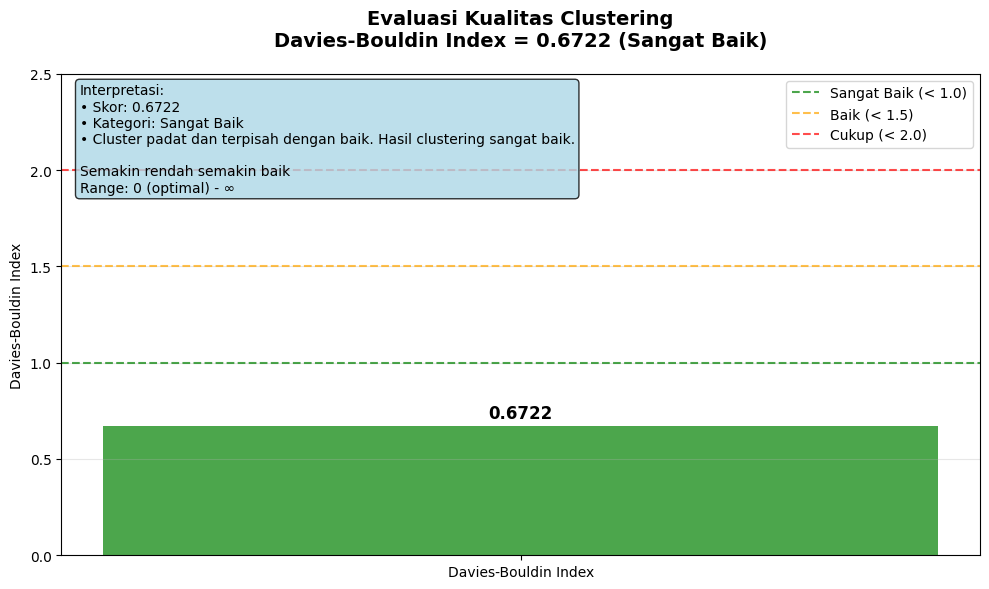

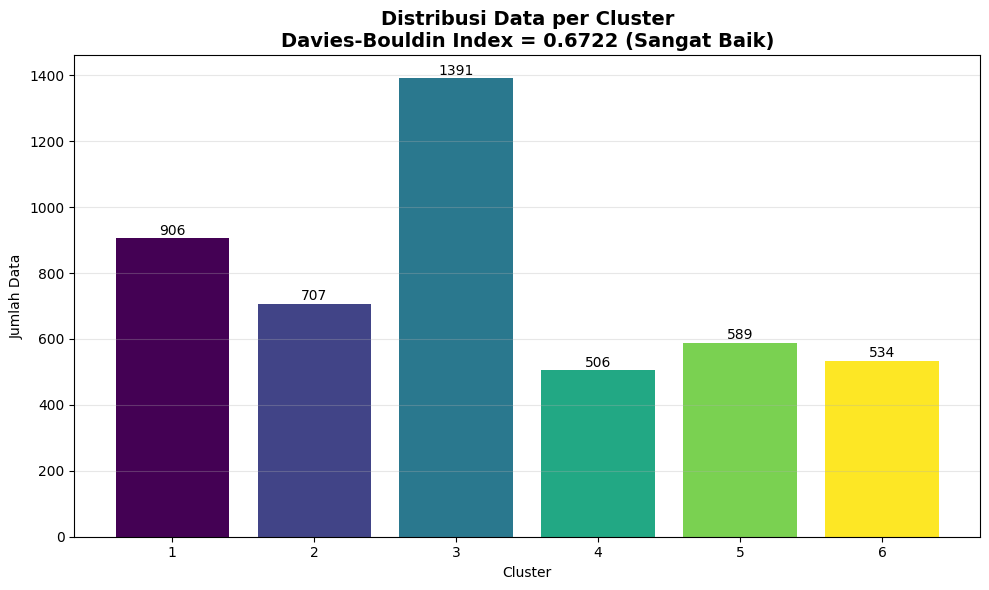

In [ ]:
# Langkah 11: Evaluasi Kualitas Cluster Dengan DBI
print("LANGKAH 11: EVALUASI KUALITAS CLUSTER DENGAN DAVIES-BOULDIN INDEX \n")

# Hitung Davies-Bouldin Index
dbi_score = davies_bouldin_score(X_normalized, cluster_labels)

print(f"HASIL EVALUASI CLUSTER:")
print(f"Davies-Bouldin Index: {dbi_score:.4f}")

# Interpretasi hasil DBI
if dbi_score < 1:
    dbi_kategori = "Sangat Baik"
    dbi_keterangan = "Cluster padat dan terpisah dengan baik. Hasil clustering sangat baik."
elif dbi_score < 1.5:
    dbi_kategori = "Baik"
    dbi_keterangan = "Cluster cukup padat dan terpisah. Hasil clustering baik."
elif dbi_score < 2:
    dbi_kategori = "Cukup"
    dbi_keterangan = "Cluster agak tumpang tindih atau kurang padat. Hasil clustering cukup."
else:
    dbi_kategori = "Kurang"
    dbi_keterangan = "Cluster tumpang tindih atau kurang terdefinisi. Hasil clustering kurang baik."

# Determine silhouette category
try:
    if best_silhouette > 0.5:
        silhouette_kategori = "Baik"
    elif best_silhouette > 0.25:
        silhouette_kategori = "Cukup"
    else:
        silhouette_kategori = "Kurang"
except NameError:
    silhouette_kategori = "Unknown (best_silhouette not available)"
    dbi_keterangan = "Cluster tumpang tindih atau kurang terdefinisi. Hasil clustering kurang baik." # Add this line to define dbi_keterangan in case of NameError


# Visualisasi Davies-Bouldin Index
plt.figure(figsize=(10, 6))

# Buat bar chart untuk DBI score
colors = ['green' if dbi_score < 1 else 'orange' if dbi_score < 1.5 else 'red' if dbi_score < 2 else 'darkred']
bars = plt.bar(['Davies-Bouldin Index'], [dbi_score], color=colors[0], alpha=0.7, width=0.5)

# Tambahkan garis referensi untuk kategori
plt.axhline(y=1, color='green', linestyle='--', alpha=0.7, label='Sangat Baik (< 1.0)')
plt.axhline(y=1.5, color='orange', linestyle='--', alpha=0.7, label='Baik (< 1.5)')
plt.axhline(y=2, color='red', linestyle='--', alpha=0.7, label='Cukup (< 2.0)')

# Tambahkan nilai pada bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.02,
             f'{height:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=12)

plt.ylabel('Davies-Bouldin Index')
plt.title(f'Evaluasi Kualitas Clustering\nDavies-Bouldin Index = {dbi_score:.4f} ({dbi_kategori})',
          fontsize=14, fontweight='bold', pad=20)
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3, axis='y')
plt.ylim(0, max(2.5, dbi_score + 0.3))

# Tambahkan text box dengan interpretasi
textstr = f'''Interpretasi:
• Skor: {dbi_score:.4f}
• Kategori: {dbi_kategori}
• {dbi_keterangan}

Semakin rendah semakin baik
Range: 0 (optimal) - ∞'''

props = dict(boxstyle='round', facecolor='lightblue', alpha=0.8)
plt.text(0.02, 0.98, textstr, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()

# Tambahan: Visualisasi distribusi cluster dengan informasi DBI
plt.figure(figsize=(10, 6))

cluster_counts = df['Cluster'].value_counts().sort_index()
bars = plt.bar(cluster_counts.index, cluster_counts.values,
               color=plt.cm.viridis(np.linspace(0, 1, len(cluster_counts))))
plt.xlabel('Cluster')
plt.ylabel('Jumlah Data')
plt.title(f'Distribusi Data per Cluster\nDavies-Bouldin Index = {dbi_score:.4f} ({dbi_kategori})',
          fontsize=14, fontweight='bold')

for bar, count in zip(bars, cluster_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 1,
            f'{count}', ha='center', va='bottom')

plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

DECISION TREE

In [ ]:
# Langkah 12: Prediksi Cluster dengan Decision Tree
print("LANGKAH 12: PREDIKSI CLUSTER DENGAN DECISION TREE \n")

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

# Siapkan data untuk Decision Tree
# X = fitur (Usia, Jenis Kelamin, Penyakit)
# y = target (Cluster hasil K-Means)
X_dt = X_encoded[['Usia', 'Jenis Kelamin', 'Penyakit']].copy()
y_dt = X_encoded['Cluster'].copy()

print(f"Data untuk Decision Tree:")
print(f"- Jumlah data: {len(X_dt)}")
print(f"- Fitur: {list(X_dt.columns)}")
print(f"- Target: Cluster (1-{max(y_dt)})")

# Split data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(
    X_dt, y_dt, test_size=0.2, random_state=42, stratify=y_dt
)

print(f"\nPembagian Data:")
print(f"- Data Training: {len(X_train)} ({len(X_train)/len(X_dt)*100:.1f}%)")
print(f"- Data Testing: {len(X_test)} ({len(X_test)/len(X_dt)*100:.1f}%)")

LANGKAH 12: PREDIKSI CLUSTER DENGAN DECISION TREE 

Data untuk Decision Tree:
- Jumlah data: 4633
- Fitur: ['Usia', 'Jenis Kelamin', 'Penyakit']
- Target: Cluster (1-6)

Pembagian Data:
- Data Training: 3706 (80.0%)
- Data Testing: 927 (20.0%)


In [ ]:
# Langkah 13: Training Decision Tree Model
print("\nLANGKAH 13: TRAINING DECISION TREE MODEL \n")

# Inisialisasi dan training model Decision Tree
dt_model = DecisionTreeClassifier(
    random_state=42,
    max_depth=5,  # Batasi kedalaman untuk menghindari overfitting
    min_samples_split=5,  # Minimum sampel untuk split
    min_samples_leaf=3   # Minimum sampel di leaf
)

# Train model
dt_model.fit(X_train, y_train)

# Prediksi pada data testing
y_pred = dt_model.predict(X_test)

print("Model Decision Tree berhasil di-training!")
print(f"Max depth: {dt_model.max_depth}")
print(f"Number of leaves: {dt_model.get_n_leaves()}")


LANGKAH 13: TRAINING DECISION TREE MODEL 

Model Decision Tree berhasil di-training!
Max depth: 5
Number of leaves: 8



LANGKAH 14: EVALUASI MODEL DECISION TREE 

Akurasi Model: 0.9989 (99.89%)

Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.99      1.00       181
           2       1.00      1.00      1.00       142
           3       1.00      1.00      1.00       278
           4       1.00      1.00      1.00       101
           5       1.00      1.00      1.00       118
           6       1.00      1.00      1.00       107

    accuracy                           1.00       927
   macro avg       1.00      1.00      1.00       927
weighted avg       1.00      1.00      1.00       927


Confusion Matrix:


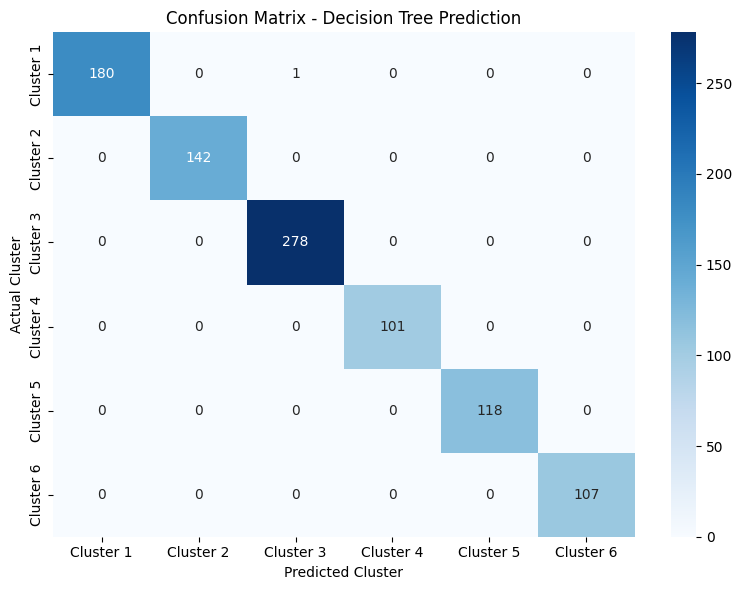


Feature Importance:
         Feature  Importance
0           Usia    0.451692
2       Penyakit    0.307450
1  Jenis Kelamin    0.240858


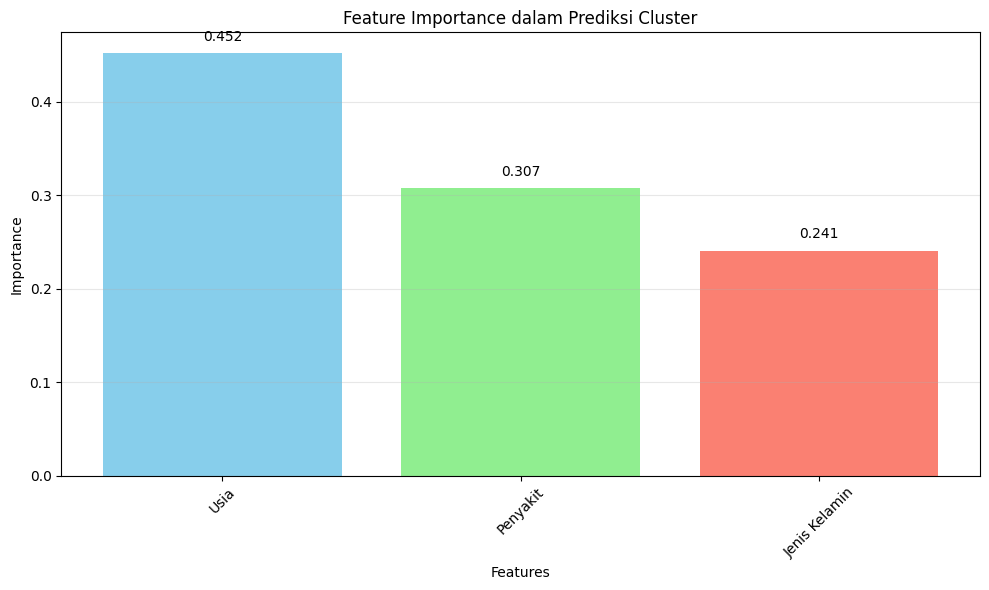

In [ ]:
# Langkah 14: Evaluasi Model Decision Tree
print("\nLANGKAH 14: EVALUASI MODEL DECISION TREE \n")

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy:.4f} ({accuracy*100:.2f}%)")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f"\nConfusion Matrix:")

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Cluster {i}' for i in sorted(y_dt.unique())],
            yticklabels=[f'Cluster {i}' for i in sorted(y_dt.unique())])
plt.title('Confusion Matrix - Decision Tree Prediction')
plt.xlabel('Predicted Cluster')
plt.ylabel('Actual Cluster')
plt.tight_layout()
plt.show()

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X_dt.columns,
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Visualisasi Feature Importance
plt.figure(figsize=(10, 6))
bars = plt.bar(feature_importance['Feature'], feature_importance['Importance'],
               color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Feature Importance dalam Prediksi Cluster')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)

# Tambahkan nilai pada bar
for bar, importance in zip(bars, feature_importance['Importance']):
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.01,
             f'{importance:.3f}', ha='center', va='bottom')

plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()


LANGKAH 15: VISUALISASI DECISION TREE 



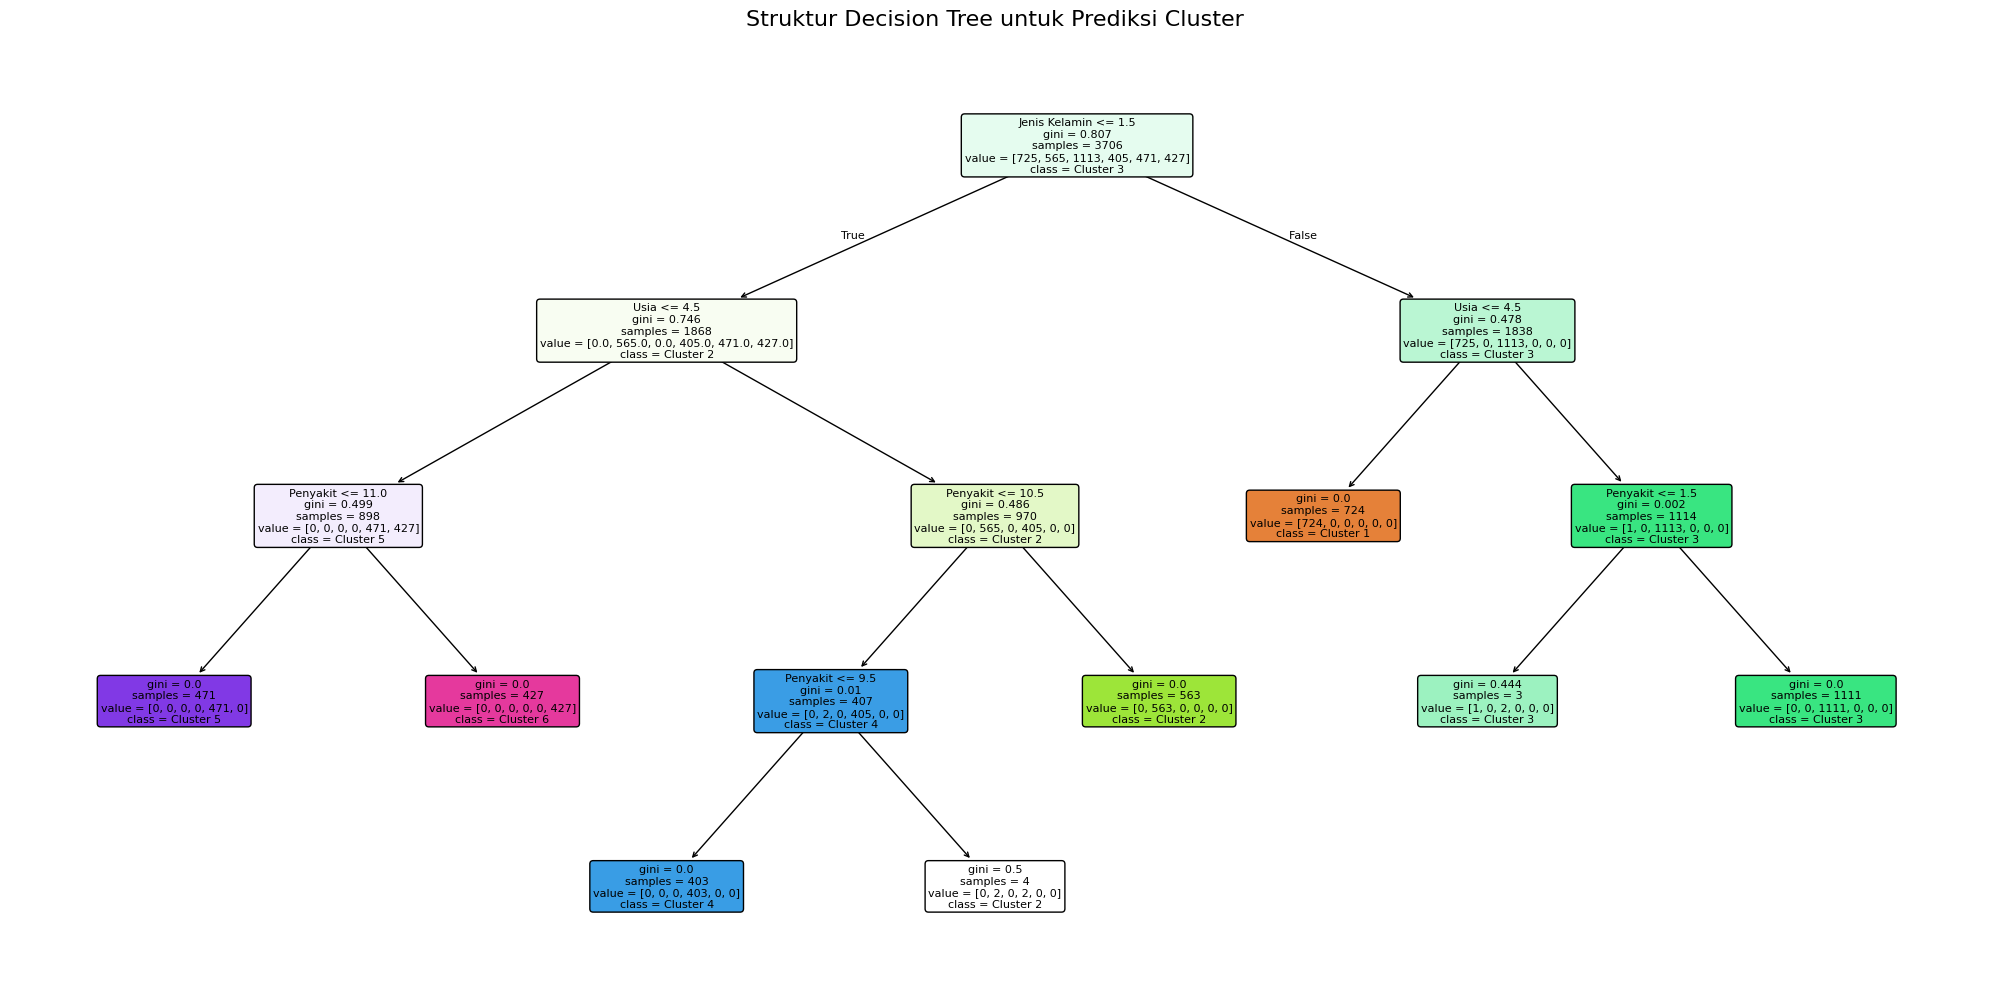

In [ ]:
# Langkah 15: Visualisasi Decision Tree
print("\nLANGKAH 15: VISUALISASI DECISION TREE \n")

# Visualisasi struktur Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model,
          feature_names=X_dt.columns,
          class_names=[f'Cluster {i}' for i in sorted(y_dt.unique())],
          filled=True,
          rounded=True,
          fontsize=8)
plt.title('Struktur Decision Tree untuk Prediksi Cluster', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

In [ ]:
# Langkah 16: Fungsi Prediksi untuk Data Baru
print("\nLANGKAH 16: FUNGSI PREDIKSI UNTUK DATA BARU \n")

def prediksi_cluster(usia, jenis_kelamin, penyakit):
    """
    Fungsi untuk memprediksi cluster berdasarkan data pasien baru

    Parameters:
    - usia: kelompok usia (1-9)
    - jenis_kelamin: 1 (Laki-laki) atau 2 (Perempuan)
    - penyakit: kode penyakit (1-22)

    Returns:
    - cluster: prediksi cluster (1-n)
    """

    # Buat dataframe untuk prediksi
    data_baru = pd.DataFrame({
        'Usia': [usia],
        'Jenis Kelamin': [jenis_kelamin],
        'Penyakit': [penyakit]
    })

    # Prediksi cluster
    cluster_pred = dt_model.predict(data_baru)[0]

    # Probabilitas prediksi
    proba = dt_model.predict_proba(data_baru)[0]

    return cluster_pred, proba

# Contoh penggunaan fungsi prediksi
print("Contoh Prediksi untuk Data Baru:")
print("-" * 40)

# Contoh 1: Pasien dengan Hipertensi
usia_contoh = 6  # 36-45 tahun
jk_contoh = 1    # Laki-laki
penyakit_contoh = 14  # Hipertensi

cluster_hasil, probabilitas = prediksi_cluster(usia_contoh, jk_contoh, penyakit_contoh)

print(f"Contoh 1:")
print(f"- Usia: {usia_decode[usia_contoh]}")
print(f"- Jenis Kelamin: {jenis_kelamin_decode[jk_contoh]}")
print(f"- Penyakit: {penyakit_decode[penyakit_contoh]}")
print(f"- Prediksi Cluster: {cluster_hasil}")
print(f"- Probabilitas: {probabilitas[cluster_hasil-1]:.3f}")

print("\nProbabilitas untuk setiap cluster:")
for i, prob in enumerate(probabilitas):
    print(f"  Cluster {i+1}: {prob:.3f}")

# Contoh 2: Pasien dengan ISPA
print(f"\nContoh 2:")
usia_contoh2 = 2  # 5-11 tahun
jk_contoh2 = 2    # Perempuan
penyakit_contoh2 = 16  # ISPA

cluster_hasil2, probabilitas2 = prediksi_cluster(usia_contoh2, jk_contoh2, penyakit_contoh2)

print(f"- Usia: {usia_decode[usia_contoh2]}")
print(f"- Jenis Kelamin: {jenis_kelamin_decode[jk_contoh2]}")
print(f"- Penyakit: {penyakit_decode[penyakit_contoh2]}")
print(f"- Prediksi Cluster: {cluster_hasil2}")
print(f"- Probabilitas: {probabilitas2[cluster_hasil2-1]:.3f}")


LANGKAH 16: FUNGSI PREDIKSI UNTUK DATA BARU 

Contoh Prediksi untuk Data Baru:
----------------------------------------
Contoh 1:
- Usia: 36-45 Tahun
- Jenis Kelamin: Laki-Laki
- Penyakit: Hipertensi
- Prediksi Cluster: 2
- Probabilitas: 1.000

Probabilitas untuk setiap cluster:
  Cluster 1: 0.000
  Cluster 2: 1.000
  Cluster 3: 0.000
  Cluster 4: 0.000
  Cluster 5: 0.000
  Cluster 6: 0.000

Contoh 2:
- Usia: 5-11 Tahun
- Jenis Kelamin: Perempuan
- Penyakit: ISPA
- Prediksi Cluster: 1
- Probabilitas: 1.000



LANGKAH 17: EVALUASI PERBANDINGAN K-MEANS VS DECISION TREE 

PERBANDINGAN HASIL:
- Akurasi Decision Tree pada seluruh data: 0.9991 (99.91%)
- Akurasi Decision Tree pada data test: 0.9989 (99.89%)

ANALISIS PERBEDAAN:
- Jumlah data dengan prediksi berbeda: 4
- Persentase perbedaan: 0.09%


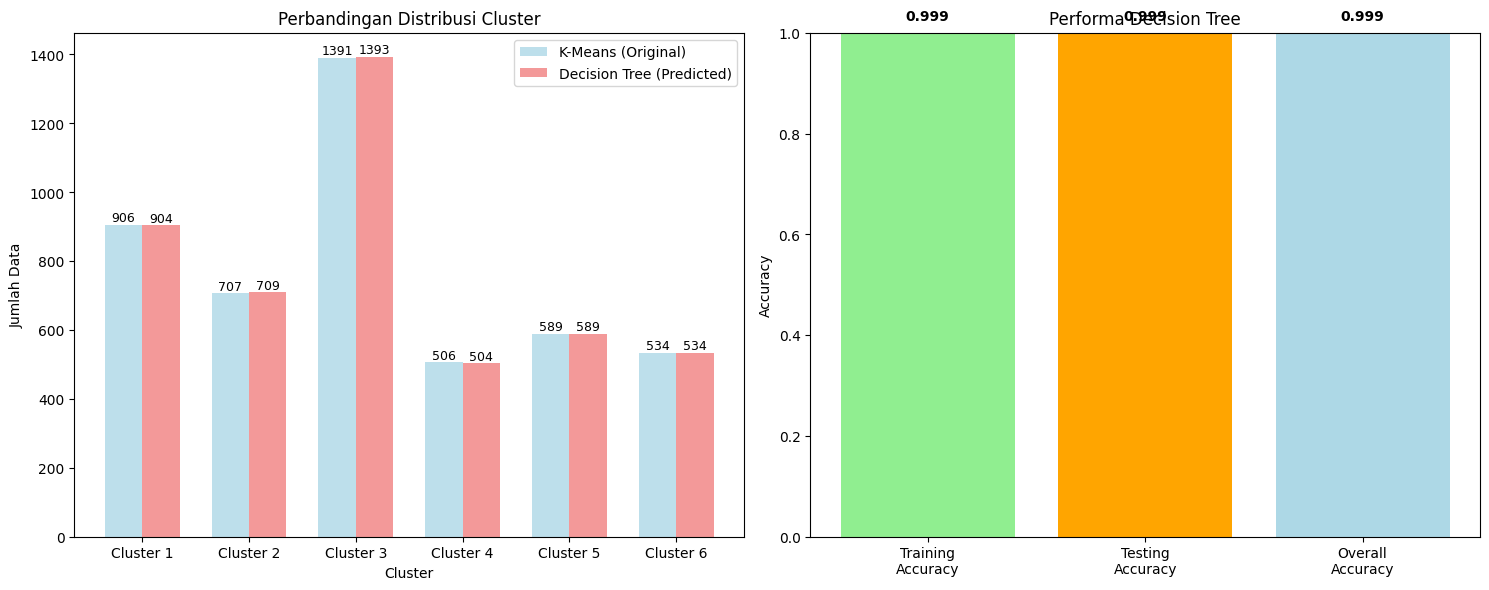


KESIMPULAN:
1. Decision Tree berhasil mempelajari pola clustering dari K-Means
2. Model dapat digunakan untuk prediksi cluster pada data baru
3. Feature importance menunjukkan variabel mana yang paling berpengaruh
4. Akurasi yang tinggi menunjukkan konsistensi antara clustering dan prediksi


In [ ]:
# Langkah 17: Evaluasi Perbandingan K-Means vs Decision Tree
print("\nLANGKAH 17: EVALUASI PERBANDINGAN K-MEANS VS DECISION TREE \n")

# Bandingkan hasil clustering asli dengan prediksi Decision Tree pada seluruh data
y_all_pred = dt_model.predict(X_dt)
accuracy_all = accuracy_score(y_dt, y_all_pred)

print("PERBANDINGAN HASIL:")
print(f"- Akurasi Decision Tree pada seluruh data: {accuracy_all:.4f} ({accuracy_all*100:.2f}%)")
print(f"- Akurasi Decision Tree pada data test: {accuracy:.4f} ({accuracy*100:.2f}%)")

# Analisis perbedaan prediksi
perbedaan = y_dt != y_all_pred
jumlah_perbedaan = perbedaan.sum()

print(f"\nANALISIS PERBEDAAN:")
print(f"- Jumlah data dengan prediksi berbeda: {jumlah_perbedaan}")
print(f"- Persentase perbedaan: {(jumlah_perbedaan/len(y_dt))*100:.2f}%")

# Visualisasi perbandingan
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Distribusi cluster asli vs prediksi
cluster_original = y_dt.value_counts().sort_index()
cluster_predicted = pd.Series(y_all_pred).value_counts().sort_index()

x = np.arange(len(cluster_original))
width = 0.35

bars1 = axes[0].bar(x - width/2, cluster_original.values, width,
                    label='K-Means (Original)', color='lightblue', alpha=0.8)
bars2 = axes[0].bar(x + width/2, cluster_predicted.values, width,
                    label='Decision Tree (Predicted)', color='lightcoral', alpha=0.8)

axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Jumlah Data')
axes[0].set_title('Perbandingan Distribusi Cluster')
axes[0].set_xticks(x)
axes[0].set_xticklabels([f'Cluster {i}' for i in cluster_original.index])
axes[0].legend()

# Tambahkan nilai pada bar
for bar1, bar2 in zip(bars1, bars2):
    axes[0].text(bar1.get_x() + bar1.get_width()/2., bar1.get_height() + 0.5,
                f'{int(bar1.get_height())}', ha='center', va='bottom', fontsize=9)
    axes[0].text(bar2.get_x() + bar2.get_width()/2., bar2.get_height() + 0.5,
                f'{int(bar2.get_height())}', ha='center', va='bottom', fontsize=9)

# Plot 2: Accuracy metrics
methods = ['Training\nAccuracy', 'Testing\nAccuracy', 'Overall\nAccuracy']
accuracies = [accuracy_all, accuracy, accuracy_all]  # Untuk overall sama dengan accuracy_all

bars = axes[1].bar(methods, accuracies, color=['lightgreen', 'orange', 'lightblue'])
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Performa Decision Tree')
axes[1].set_ylim(0, 1)

# Tambahkan nilai pada bar
for bar, acc in zip(bars, accuracies):
    axes[1].text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.02,
                f'{acc:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\nKESIMPULAN:")
print("1. Decision Tree berhasil mempelajari pola clustering dari K-Means")
print("2. Model dapat digunakan untuk prediksi cluster pada data baru")
print("3. Feature importance menunjukkan variabel mana yang paling berpengaruh")
print("4. Akurasi yang tinggi menunjukkan konsistensi antara clustering dan prediksi")